In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from numpy import pi

# Acontinuación viene una breve explicación que sera introductoria para lo que se quiere hacer.  

### El cálculo exacto de áreas y volúmenes de objetos que se encuentran en el plano o en el espacio es una propiedad que solo se puede asignar a unos pocos objetos. En la mayoría de los casos, el área (o volumen) del objeto de estudio debe ser calculada de manera aproximada.

### Un método posible para el cálculo de áreas (y volúmenes) consiste en generar una región que contenga al objeto de estudio y cuya área (o volúmen) sea conocida o fácilmente calculable, luego, se llena esa región con samples generados de manera aleatoria, siguiendo una distribución uniforme, y se encuentra la relación entre la cantidad total de samples generados dentro de la región ($N_R$) y la cantidad de samples que cayeron dentro del objeto ($N_O$). El área del objeto de estudio estará dada por,

$A_O \approx \frac{N_O}{N_R} A_R \ .$

### La aproximación será más precisa cuanto mayor sea la cantidad de samples generados.

### Por ejemplo, demostremos que el área correspondiente a una función Gaussiana con $\sigma = 1$ es $\sqrt{2\pi}$:

###    $ \sqrt{2\pi} = \int_{-\infty}^{\infty} e^{-x^2/2} \, dx \ . $

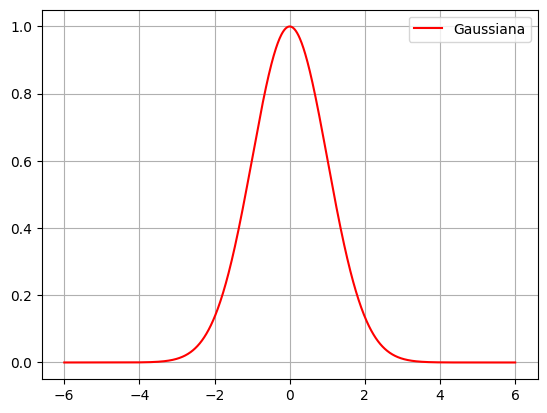

In [ ]:
x = np.linspace(-6,6,1000)
y = np.exp(-x*x/2)

plt.plot(x,y, color = 'red', label = 'Gaussiana')
plt.legend()
plt.grid()
plt.show()

### Generamos una región de área fácilmente calculable que contenga una parte importante de la Gaussiana. Por ejemplo, la región dada por $-4 < x < 4$ y $0 < y < 1$. Esta región tiene un área igual a 8.

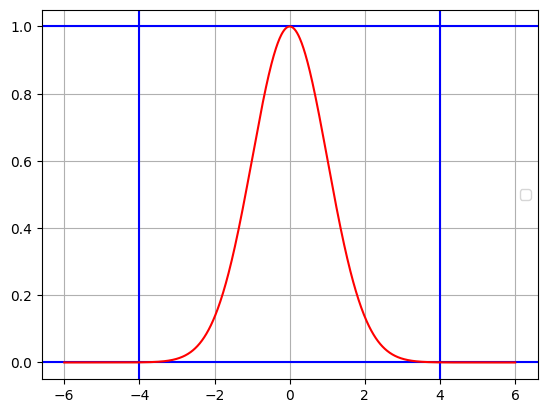

In [ ]:
plt.axhline(1, color = 'blue')
plt.axhline(0, color = 'blue')
plt.axvline(-4, color = 'blue')
plt.axvline(4, color = 'blue')
plt.plot(x,y, color = 'red')
plt.legend()
plt.grid()
plt.show()

### Llenamos la región con samples generados a partir de una distribución uniforme.

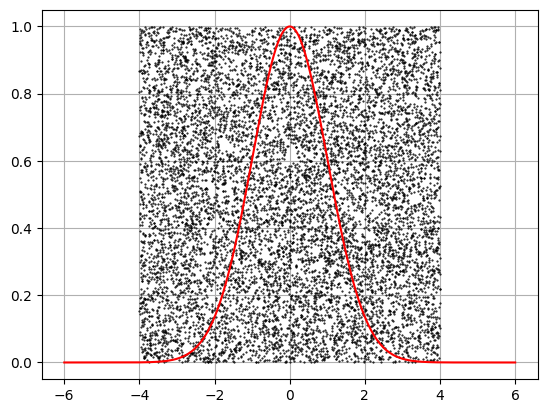

In [ ]:
N_samples = 10000

xx = random.uniform(low=-4, high=4, size=N_samples)
yy = random.uniform(low=0, high=1, size=N_samples)
xy = np.vstack((xx,yy))

plt.plot(xy[0,:],xy[1,:],'k.', markersize = 1)
plt.plot(x,y, color = 'red')
plt.grid()
plt.show()

### Nos quedamos con los samples que se encuentran dentro de la Gaussiana ("EL sample $q_j$ está dentro de la Gaussiana" $\equiv$ $y_j \leq e^{-x_j^2/2}$), los contamos, y calculamos el área correspondiente a la Gaussiana.

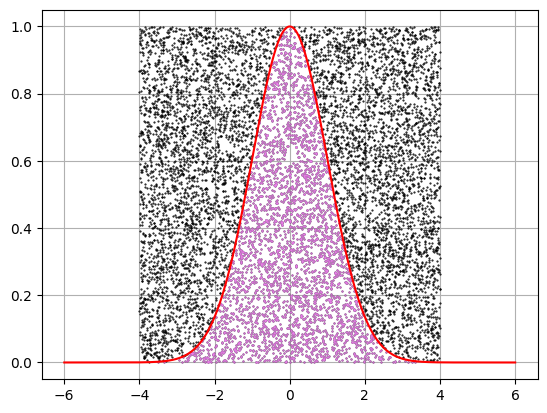



Area de la Gaussiana = 2.5552


In [ ]:
Gaussiana = xy[1,:] <= np.exp(-xy[0,:]**2/2)

xy_Gaussiana = xy[:,Gaussiana]


plt.plot(xy[0,:],xy[1,:],'k.', markersize = 1)
plt.plot(xy_Gaussiana[0,:],xy_Gaussiana[1,:],'.', color = 'violet', markersize = 1)
plt.plot(x,y, color = 'red')
plt.grid()
plt.show()

A_region = 8

N_samples_Gaussiana = xy_Gaussiana.shape[1]

A_Gaussiana = A_region*(N_samples_Gaussiana/N_samples)

print('')
print('')

print('Area de la Gaussiana =', A_Gaussiana)

### Podemos hacer una gráfica del área calculada en función del número de samples generados y observar cómo esta se aproxima a $\sqrt{2\pi}$ a medida que el número de samples aumenta.

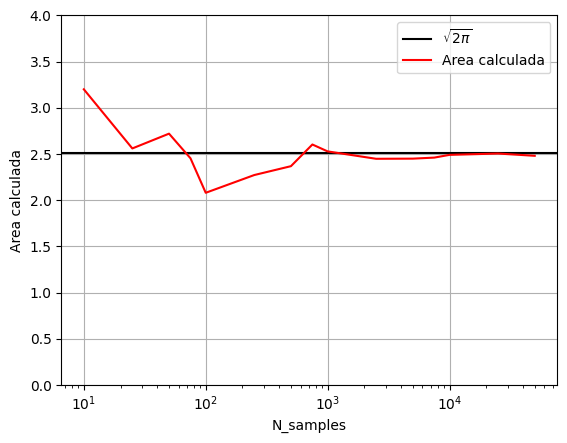

In [ ]:
N = np.array([10,25,50,75,100,250,500,750,1000,2500,5000,7500,10000,25000,50000])
A_Gaussiana = np.linspace(0,1,N.shape[0])

for i, j in enumerate(N):

    N_samples = j

    xx = random.uniform(low=-4, high=4, size=N_samples)
    yy = random.uniform(low=0, high=1, size=N_samples)
    xy = np.vstack((xx,yy))

    Gaussiana = xy[1,:] <= np.exp(-xy[0,:]**2/2)

    xy_Gaussiana = xy[:,Gaussiana]

    N_samples_Gaussiana = xy_Gaussiana.shape[1]

    A_region = 8

    A_Gaussiana[i] = A_region*(N_samples_Gaussiana/N_samples)

plt.axhline(pow(2*pi,0.5), color = 'black',label = '$ \sqrt{2\pi}$')
plt.plot(N,A_Gaussiana, color = 'red',label = 'Area calculada')
plt.xlabel('N_samples')
plt.ylabel('Area calculada')
plt.legend()
plt.xscale('log')
plt.ylim(0,4.0)
plt.grid()
plt.show()



# Tarea:

### A continuación, se proporcionan 3 arrays diferentes de numpy en formato `.txt`. Subir estos archivos a un script de Python y analizar la forma de cada uno de ellos. Notará que son matrices de 2xN, es decir, cada matriz está compuesta por N puntos, donde las componentes **x** e **y** de los puntos están dadas por la primera y segunda fila. Realizar un gráfico (plot) para visualizar cómo se distribuyen los puntos correspondientes a cada una de las matrices en el espacio. Notará que las figuras resultantes son bien conocidas, algunas de las cuales pertenecen a la familia de las secciones cónicas.

### Mediante el método explicado anteriormente, calcular el área de cada una de las figuras siguiendo los siguientes pasos:

---

### Pasos propuestos para las secciones cónicas (realizar algo similar con las otras figuras):

1) Puede resultar difícil definir el conjunto de proposiciones lógicas que deben cumplir los samples que se encuentran dentro de la región de estudio. Para las secciones cónicas, lo que se puede hacer es trasladar el centro de la sección cónica al origen y luego aplicarle una transformación lineal que la convierta en el círculo unitario. Si se aplica el mismo conjunto de operaciones a los samples, todos los samples que estaban dentro de la sección cónica ahora estarán dentro del círculo unitario (mantener los samples dentro de la figura transformada es una propiedad de las transformaciones lineales). La diferencia entre el estado antes de aplicar la transformación es que ahora será más sencillo definir el conjunto de proposiciones lógicas que deben cumplir los samples que se encuentran dentro del círculo unitario.

2) Para transformar la sección cónica en el círculo unitario, debe encontrar los vectores principales que definen la sección cónica y asociarlos a los vectores canónicos mediante una transformación lineal.

3) Para encontrar los vectores principales de la sección cónica, primero debe determinar su centro. El centro puede calcularse como el centro de masa de los puntos que forman la sección cónica (los puntos de la matriz 2xN), ya que estos están distribuidos uniformemente en el ángulo que parametriza la sección cónica.

4) Una vez encontrado el centro de la sección cónica, los vectores principales pueden obtenerse localizando los dos puntos más alejados y los dos puntos más cercanos al centro.

---

### Detallar todos los pasos realizados, generando un gráfico para cada uno de ellos, como por ejemplo:

- El gráfico que muestra el centro y los vectores principales de la sección cónica una vez encontrados.
- El gráfico que muestra cómo se transforma la sección cónica en el círculo unitario.
- Una vez que hayan sido identificados, pinta los samples que se encuentran dentro del círculo unitario y la sección cónica.

### Realizar un gráfico de cómo cambia el área calculada para la sección cónica en función del número de samples generados. Mostrar que la curva converge al valor $A = \pi |\vec{v}_1 \times \vec{v}_2|$, donde $\vec{v}_j$ se refiere al vector principal $j$ y $\times$ se refiere al producto vectorial entre vectores. Indicar en el gráfico $A = \pi |\vec{v}_1 \times \vec{v}_2|$ con una línea horizontal.

### Además, realizar un gráfico de cómo cambia el cociente entre el área calculada para la sección cónica y el área del círculo unitario en función del número de samples generados. ¿A qué valor converge este cociente?. En este mismo gráfico, indicar con una línea horizontal el determinante de la matriz de la transformación. ¿Cómo se relacionan este cociente y este determinante? Explicar.

---

### Realizar lo mismo con las demás figuras.


# Nota

### Lo que se hizo en este trabajo fue transformar una figura cuya área queríamos conocer en una figura más elemental cuya área es más fácil de calcular. Esto es lo que hace el método de integración por cambio de variables. Por ejemplo, en muchos problemas de análisis matemático, es común pasar de coordenadas cartesianas a coordenadas polares; este cambio de variables hace que los círculos centrados en el punto $\vec{P} = \vec{0}$ se transformen en rectangulos.